# üß™ Preparcial ‚Äì Caso de Negocio ‚ÄúYumFit‚Äù
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la pr√≥xima campa√±a de retenci√≥n y cross-selling.

### Misi√≥n
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendaci√≥n t√°ctica:
1. Conocer la base de clientes ‚Üí *EDA*  
2. Calcular **CAC** y **LTV** ‚Üí *M√©tricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* ‚Üí *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster ‚Üí *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) ‚Üí *Comunicaci√≥n*  
6. Asignar presupuesto y justificar ‚Üí *Decisi√≥n ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1‚Ä¶P12) y prepara un informe ejecutivo breve al final.

In [1]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-29 23:56:33--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-29 23:56:33--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‚Äòclientes_segmentos (1).csv‚Äô

clientes_segmen

In [2]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

### P1. ¬øCu√°ntos clientes hay y c√≥mo se distribuyen por plataforma?


In [3]:
df.head()

id_cliente  edad genero  ingresos plataforma  interacciones  compras  \
0     C00000    24      M     29869  Instagram             35        2   
1     C00001    38      M     77827  Instagram             36        1   
2     C00002    39      M     18000  Instagram             25        2   
3     C00003    20      F     42914  Instagram             29        4   
4     C00004    38      M     30536  Instagram             33        3   

   total_gastado fecha_ultima_compra  costo_adquisicion  
0             74          2024-12-25                 20  
1             35          2025-01-24                 10  
2            116          2025-01-18                 16  
3            112          2025-03-14                 11  
4            147          2025-01-01                 23

In [4]:
numero_clientes = df['id_cliente'].nunique()
numero_clientes

15000

In [5]:
distribucion_plataforma = df.groupby('plataforma')['id_cliente'].nunique().reset_index()
distribucion_plataforma.columns = ['Plataforma', 'N√∫mero de Clientes']
distribucion_plataforma

Plataforma  N√∫mero de Clientes
0   Facebook                5288
1  Instagram                5972
2     TikTok                3740

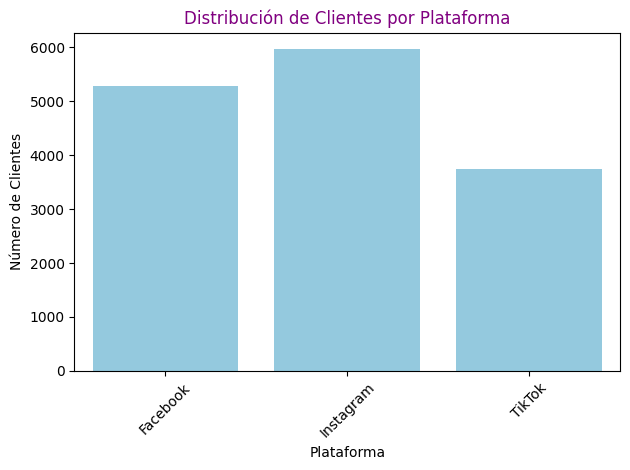

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=distribucion_plataforma, x='Plataforma', y='N√∫mero de Clientes', color='skyblue')
plt.ylabel('N√∫mero de Clientes')
plt.title('Distribuci√≥n de Clientes por Plataforma', color='purple')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### P2. ¬øC√≥mo es la distribuci√≥n de la edad? ¬øHay outliers?


In [7]:
df['edad'].describe()

count    15000.000000
mean        33.101800
std         11.393441
min         16.000000
25%         24.000000
50%         31.000000
75%         40.000000
max         60.000000
Name: edad, dtype: float64

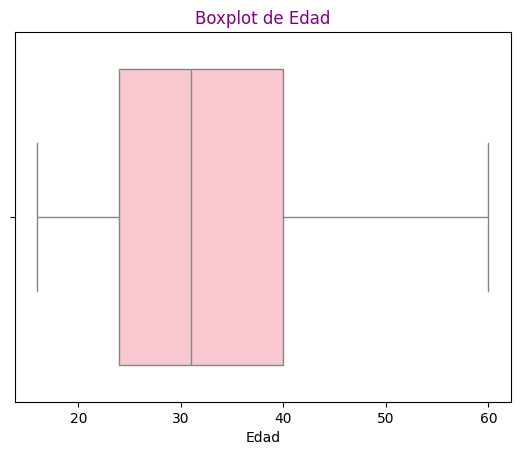

In [8]:
sns.boxplot(x=df['edad'],color='pink') # Gr√°fico para visualizar los outliers
plt.title('Boxplot de Edad', color='purple')
plt.xlabel('Edad')
plt.show()

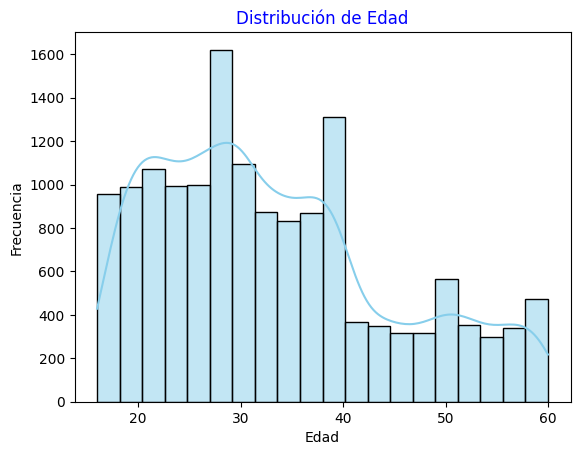

In [9]:
sns.histplot(df['edad'], bins=20, kde=True, color='skyblue') #Visualizaci√≥n de la distribuci√≥n de la edad
plt.title('Distribuci√≥n de Edad', color='blue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### P3. ¬øExiste correlaci√≥n entre ingresos y total_gastado?


In [10]:
correlacion = df['ingresos'].corr(df['total_gastado'])
print(f"Correlaci√≥n entre income y total_gastado: {correlacion:.2f}")

Correlaci√≥n entre income y total_gastado: 0.26


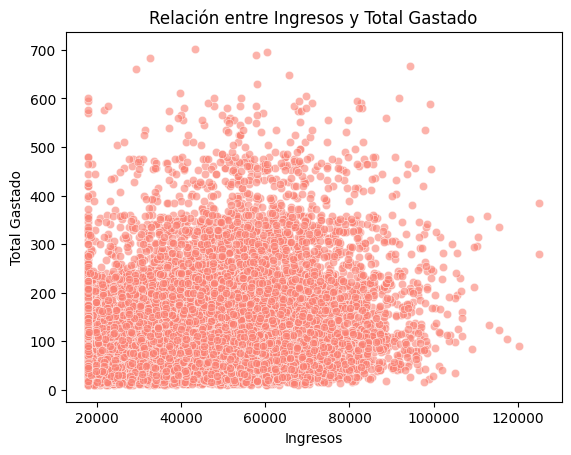

In [11]:
sns.scatterplot(data=df, x='ingresos', y='total_gastado', alpha=0.6, color='salmon') #correlaci√≥n entre ingresos y total gastado
plt.title('Relaci√≥n entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()

#### üíµ FASE 2 ‚Äì M√âTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [12]:
from datetime import datetime

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)

### P4. CAC vs LTV por plataforma

In [13]:
cac_por_plataforma = df.groupby('plataforma')['costo_adquisicion'].mean() #CAC por plataforma
cac_por_plataforma.columns = ['plataforma', 'CAC']
cac_por_plataforma

plataforma
Facebook     25.039334
Instagram    17.488948
TikTok       12.598128
Name: costo_adquisicion, dtype: float64

In [14]:
ltv_por_plataforma = df.groupby('plataforma')['total_gastado'].mean().reset_index() #LTV por plataforma
ltv_por_plataforma.columns = ['plataforma', 'LTV']
ltv_por_plataforma

plataforma         LTV
0   Facebook  186.871407
1  Instagram   87.800904
2     TikTok   57.341979

In [15]:
df['ltv'] = df['total_gastado']  # Si LTV es total_gastado por cliente

CAC_LTV = df.groupby('plataforma')[['costo_adquisicion', 'ltv']].mean()
CAC_LTV

costo_adquisicion         ltv
plataforma                               
Facebook            25.039334  186.871407
Instagram           17.488948   87.800904
TikTok              12.598128   57.341979

#### üß© FASE 3 ‚Äì SEGMENTACI√ìN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

### P5. Visualiza clusters

#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

### P6. Ganancia promedio por cluster

### P7. G√©nero por cluster


### P8. Plataforma por cluster


### üìù FASE 5 ‚Äì PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 l√≠neas su perfil.


### üí° FASE 6 ‚Äì DECISI√ìN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¬øQu√© cluster fidelizar√≠as con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del an√°lisis.

### ENTREGA FINAL
#### Resumen ejecutivo (m√°x 1 p√°gina) con:
##### ‚Äì Nombres y descripciones de los 4 clusters
##### ‚Äì Tabla LTV, CAC, Ganancia, tama√±o
##### ‚Äì Plan de inversi√≥n y justificaci√≥n
#### Comentarios sobre c√≥mo mejorar√≠as el dataset o la metodolog√≠a